In [11]:
import pandas as pd
import numpy as np
import sys
sys.path.append('../src')
import train as t

### Dataframe info

#### Loading a processed file

In [2]:
file = 'E0_seasons_5_to_23'
seasons = pd.read_csv(f'../data/processed/{file}.csv')
seasons.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,A_gd_5,H_eff_5,A_eff_5,HST_avg_5,AST_avg_5,target,H_status,A_status,H_H2H,A_H2H
0,E0,13/08/05,Aston Villa,Bolton,2,2,D,2,2,D,...,NaN,NaN,NaN,0.0,0.0,1,NaN,NaN,NaN,NaN
1,E0,13/08/05,Everton,Man United,0,2,A,0,1,A,...,NaN,NaN,NaN,0.0,0.0,2,NaN,NaN,NaN,NaN
2,E0,13/08/05,Fulham,Birmingham,0,0,D,0,0,D,...,NaN,NaN,NaN,0.0,0.0,1,NaN,NaN,NaN,NaN
3,E0,13/08/05,Man City,West Brom,0,0,D,0,0,D,...,NaN,NaN,NaN,0.0,0.0,1,NaN,NaN,NaN,NaN
4,E0,13/08/05,Middlesbrough,Liverpool,0,0,D,0,0,D,...,NaN,NaN,NaN,0.0,0.0,1,NaN,NaN,NaN,NaN


##### Dataframe shape before cleaning

In [3]:
seasons.shape

(6840, 31)

#### Columns dtypes

In [4]:
seasons.dtypes

Div            object
Date           object
HomeTeam       object
AwayTeam       object
FTHG            int64
FTAG            int64
FTR            object
HTHG            int64
HTAG            int64
HTR            object
HS              int64
AS              int64
HST             int64
AST             int64
HY              int64
AY              int64
HR              int64
AR              int64
HPTS_avg_5    float64
APTS_avg_5    float64
H_gd_5        float64
A_gd_5        float64
H_eff_5       float64
A_eff_5       float64
HST_avg_5     float64
AST_avg_5     float64
target          int64
H_status      float64
A_status      float64
H_H2H         float64
A_H2H         float64
dtype: object

#### Processing date and cleaning data

In [12]:
t.process_data(seasons)

#### Seasons shape (number of matches, columns)

In [13]:
seasons.shape

(5388, 31)

#### New columns order

In [7]:
new_order = [
    'Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG', 'HTR', 'HS', 'AS', 'HST', 'AST', 'HY', 'AY', 'HR', 'AR', 
    'H_status', 'A_status', 'HPTS_avg_5', 'APTS_avg_5', 'H_gd_5', 'A_gd_5', 'H_eff_5', 'A_eff_5', 'HST_avg_5', 'AST_avg_5', 'H_H2H', 'A_H2H', 
    'target'
]

#### Features

In [14]:
features = ['H_status', 'A_status', 'HPTS_avg_5', 'APTS_avg_5', 'H_gd_5', 'A_gd_5', 'H_eff_5', 'A_eff_5', 'HST_avg_5', 'AST_avg_5', 'H_H2H', 'A_H2H']
seasons[features]

,H_status,A_status,HPTS_avg_5,APTS_avg_5,H_gd_5,A_gd_5,H_eff_5,A_eff_5,HST_avg_5,AST_avg_5,H_H2H,A_H2H
0,1.91,1.26,3.0,1.0,1.0,0.0,0.07,0.25,14.0,4.0,1.50,1.00
1,1.31,0.79,3.0,0.0,2.0,-1.0,0.38,0.00,8.0,4.0,2.00,0.50
2,1.52,1.31,0.0,0.0,-1.0,-4.0,0.40,0.00,5.0,8.0,1.67,1.17
3,1.05,1.13,3.0,0.0,1.0,-1.0,0.33,0.11,6.0,9.0,1.05,1.13
4,1.17,1.05,3.0,0.0,1.0,-2.0,0.20,0.50,10.0,2.0,1.17,1.05
...,...,...,...,...,...,...,...,...,...,...,...,...
5383,1.29,0.89,0.8,1.8,-7.0,-2.0,0.15,0.28,5.4,3.6,0.00,3.00
5384,1.05,1.68,1.0,0.4,-8.0,-7.0,0.30,0.53,4.6,3.4,0.75,2.25
5385,1.58,1.40,0.8,1.2,-4.0,-1.0,0.19,0.32,5.2,5.0,1.17,1.67
5386,1.74,1.05,3.0,1.2,9.0,1.0,0.26,0.38,7.6,3.2,2.00,0.50


### Predictions

#### Logistic regression

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

season_start_year = 21
X_train, X_test, y_train, y_test = t.my_train_test_split(seasons, season_start_year, features)

lr_clf = LogisticRegression(
    multi_class='ovr',
    C=0.07,
    penalty='elasticnet',
    max_iter=400,
    l1_ratio=0.77777,
    solver='saga'
)

lr_clf.fit(X_train, y_train)
y_pred_lr = lr_clf.predict(X_test)

accuracy = np.round(accuracy_score(y_test, y_pred_lr), 3)

print(f"Number of (test) matches: {y_test.shape[0]}")
print(f"Dokładność modelu treningowego: {lr_clf.score(X_train, y_train):.3f}")
print(f'Dokładność modelu testowego: {accuracy}')

Number of (test) matches: 360
Dokładność modelu treningowego: 0.534
Dokładność modelu testowego: 0.55


#### Confusion matrix

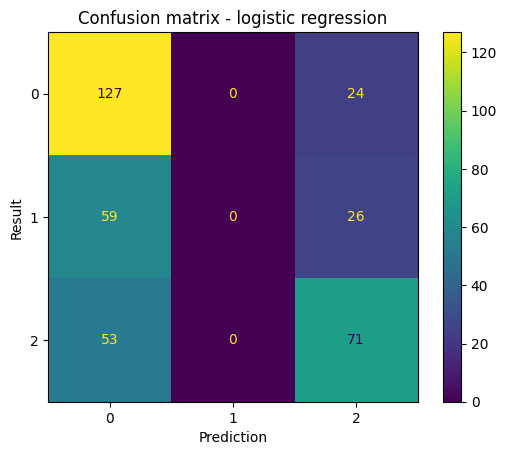

In [16]:
t.plot_confustion_matrix(y_test, y_pred_lr, lr_clf, 'logistic regression')

##### Prediction results from season 2015/16 to 2022/23

##### Premier league

In [29]:
years = [i for i in range(15, 23)]

premier_league = seasons
la_liga = pd.read_csv(f'../data/processed/SP1_seasons_5_to_23.csv')
serie_a = pd.read_csv(f'../data/processed/I1_seasons_5_to_23.csv')
ligue_1 = pd.read_csv(f'../data/processed/F1_seasons_5_to_23.csv')

leagues = [premier_league, la_liga, serie_a, ligue_1]
league_names = ['Premier League', 'La Liga', 'Serie A', 'Ligue 1']
all_leagues = []

for league in leagues:
    t.process_data(league)
    all_leagues.append(t.league_predictions(league, years, features, lr_clf))

pd.concat(all_leagues, axis=1, keys=league_names)

Premier League          La Liga          Serie A          Ligue 1         
          Season Accuracy  Season Accuracy  Season Accuracy  Season Accuracy
0          15/16    0.453   15/16    0.533   15/16    0.525   15/16    0.466
1          16/17    0.616   16/17    0.581   16/17    0.578   16/17    0.543
2          17/18    0.538   17/18    0.539   17/18    0.571   17/18    0.517
3          18/19    0.583   18/19    0.487   18/19    0.517   18/19    0.472
4          19/20    0.528   19/20    0.506   19/20    0.555   19/20    0.548
5          20/21    0.500   20/21    0.516   20/21    0.545   20/21    0.480
6          21/22    0.550   21/22    0.525   21/22    0.494   21/22    0.469
7          22/23    0.522   22/23    0.541   22/23    0.511   22/23    0.513

### Random forest

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

X_train, X_test, y_train, y_test = t.my_train_test_split(seasons, 22, features)

rf_clf = RandomForestClassifier()

param_grid = {
    'n_estimators': [100, 200, 300],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [2, 5, 10, 20, 30, None],
    'min_samples_split': [5, 10, 15],
    'min_samples_leaf': [2, 4, 8],
    'bootstrap': [True, False]
}

random_search = RandomizedSearchCV(estimator=rf_clf, param_distributions=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

random_search.fit(X_train, y_train)

print("Najlepsze parametry: ", random_search.best_params_)

Najlepsze parametry:  {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 5, 'criterion': 'log_loss', 'bootstrap': False}
